In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing import sequence

In [3]:
print(tf.__version__)
print('GPU is', 'available' if tf.config.list_physical_devices('GPU') else 'not available')

2.4.0
GPU is available


In [4]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=10000, skip_top=0, maxlen=500, seed=113,
    start_char=1, oov_char=2, index_from=3
)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Henri\anaconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Henri\anaconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

In [5]:
index = tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)

In [6]:
train_X.shape

(22882,)

In [7]:
print(' — Decoded Movie Review - ')
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = ' '.join( [reverse_index.get(i - 3, '#') for i in train_X[0]] )
print(decoded)

 — Decoded Movie Review - 
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what t

In [8]:
train_X = sequence.pad_sequences(train_X, maxlen=500)
test_X = sequence.pad_sequences(test_X, maxlen=500)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=500),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=[tf.keras.metrics.BinaryAccuracy()])

In [11]:
%%time

history = model.fit(train_X,
                    train_y,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
144/144 [==============================] - 3s 13ms/step - loss: 0.6913 - binary_accuracy: 0.5464 - val_loss: 0.6827 - val_binary_accuracy: 0.6579
Epoch 2/10
144/144 [==============================] - 1s 9ms/step - loss: 0.6787 - binary_accuracy: 0.6455 - val_loss: 0.6602 - val_binary_accuracy: 0.7756
Epoch 3/10
144/144 [==============================] - 1s 9ms/step - loss: 0.6529 - binary_accuracy: 0.7592 - val_loss: 0.6251 - val_binary_accuracy: 0.7854
Epoch 4/10
144/144 [==============================] - 1s 9ms/step - loss: 0.6140 - binary_accuracy: 0.7878 - val_loss: 0.5845 - val_binary_accuracy: 0.7946
Epoch 5/10
144/144 [==============================] - 1s 9ms/step - loss: 0.5709 - binary_accuracy: 0.8061 - val_loss: 0.5441 - val_binary_accuracy: 0.8125
Epoch 6/10
144/144 [==============================] - 1s 9ms/step - loss: 0.5308 - binary_accuracy: 0.8268 - val_loss: 0.5077 - val_binary_accuracy: 0.8285
Epoch 7/10
144/144 [==============================] - 1s 9ms/st

In [12]:
loss, accuracy = model.evaluate(test_X,
                               test_y)

721/721 [==============================] - 1s 2ms/step - loss: 0.4108 - binary_accuracy: 0.8572


In [13]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [14]:
def plot_history(history):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,3))
    fig.subplots_adjust(hspace=0.5)
    
    ax1.plot(history['loss'], label='loss')
    ax1.plot(history['val_loss'], label='val_loss')
    ax1.set_ylim([0, 1])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history['binary_accuracy'], label='Accuracy')
    ax2.plot(history['val_binary_accuracy'], label='Validation Accuracy')
    ax2.set_ylim([0, 1])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,binary_accuracy,val_loss,val_binary_accuracy,epoch
0,0.688969,0.590931,0.682714,0.657854,0
1,0.673734,0.688227,0.660162,0.775617,1
2,0.644524,0.765365,0.625083,0.785449,2
3,0.605329,0.788965,0.584484,0.794625,3
4,0.563302,0.810489,0.544111,0.812541,4
5,0.522554,0.831358,0.507676,0.828490,5
6,0.484270,0.846545,0.475998,0.828490,6
7,0.450931,0.853209,0.447002,0.857112,7
8,0.420769,0.867796,0.422701,0.864322,8
9,0.394328,0.876482,0.402172,0.861918,9


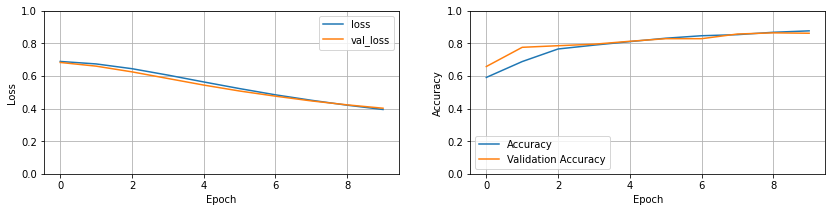

In [16]:
plot_history(hist)